In [ ]:
!pip install tensorflow

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
# Load Text Cleaning Pkgs
#import neattext.functions as nfx
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import tensorflow as tf 



ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#pip install neattext

Note: you may need to restart the kernel to use updated packages.


In [67]:
# train=pd.read_table('train.txt', delimiter = ';', header=None, )
# val=pd.read_table('val.txt', delimiter = ';', header=None, )
# test=pd.read_table('test.txt', delimiter = ';', header=None, )

# data = pd.concat([train ,  val , test])
# data.columns = ["text", "label"]
# data

#data.to_csv("emotion_final.csv")

data = pd.read_csv("emotion_final.csv")


In [68]:
data.shape

(20000, 3)

In [69]:
data.dtypes

Unnamed: 0     int64
text          object
label         object
dtype: object

In [70]:
data.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [71]:
data['label'].value_counts()

joy         6761
sadness     5797
anger       2709
fear        2373
love        1641
surprise     719
Name: label, dtype: int64

<Axes: >

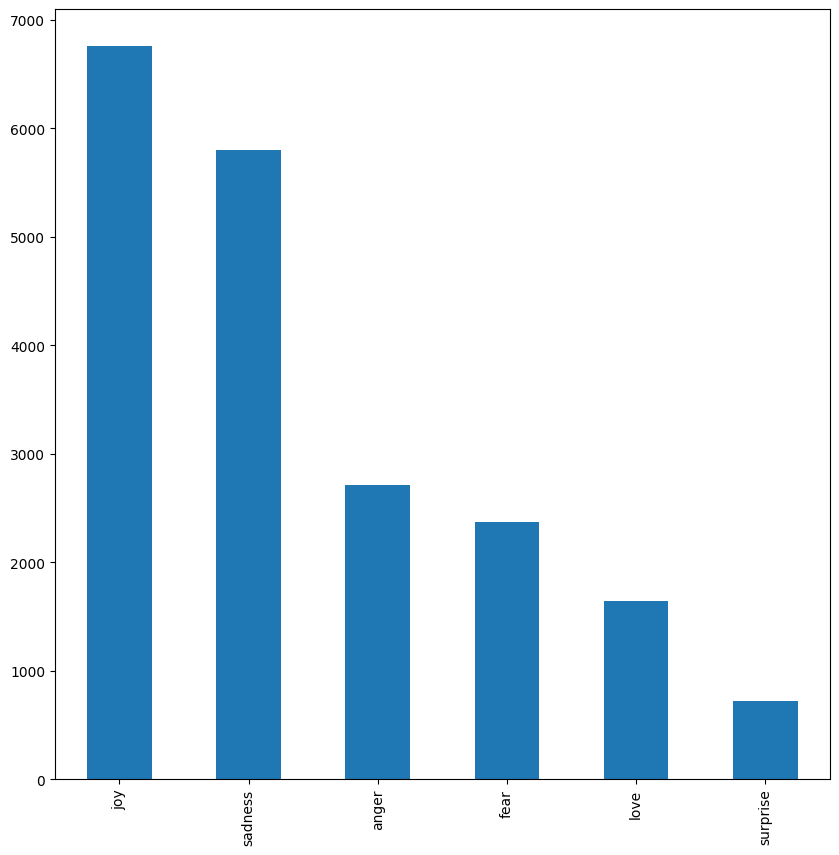

In [72]:
plt.figure(figsize=(10,10))
data['label'].value_counts().plot(kind='bar')

In [73]:
#keyword finding for each emotion

In [ ]:
#from textblob import TextBlob

In [ ]:
#pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [74]:
#text preprocessing
ps = PorterStemmer()

def preprocess(line):
    review = re.sub('[^a-zA-Z]', ' ', line) #leave only characters from a to z
    review = review.lower() #lower the text
    review = review.split() #turn string into list of words
    #apply Stemming 
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')] #delete stop words like I, and ,OR   review = ' '.join(review)
    #trun list into sentences
    return " ".join(review)


In [75]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [76]:
data['text']=data['text'].apply(lambda x: preprocess(x))


In [77]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data['N_label'] = label_encoder.fit_transform(data['label'])

In [78]:
data['text']

0                                        didnt feel humili
1        go feel hopeless damn hope around someon care ...
2                     im grab minut post feel greedi wrong
3           ever feel nostalg fireplac know still properti
4                                             feel grouchi
                               ...                        
19995    keep feel like someon unkind wrong think get b...
19996              im feel littl cranki neg doctor appoint
19997                feel use peopl give great feel achiev
19998    im feel comfort derbi feel though start step s...
19999    feel weird meet w peopl text like dont talk fa...
Name: text, Length: 20000, dtype: object

In [79]:
# Creating the Bag of Words model by applying Countvectorizer -convert textual data to numerical data


from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000,ngram_range=(1,3))#example: the course was long-> [the,the course,the course was,course, course was, course was long,...]

data_cv = cv.fit_transform(data['text']).toarray()

In [80]:
data_cv

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [81]:
#X_train, X_test, y_train, y_test=data_cv,test_cv,train['N_label'],test['N_label']
X_train, X_test, y_train, y_test =train_test_split(data_cv, data['N_label'], test_size=0.25, random_state=42)


In [82]:
# first neural network with keras tutorial
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# load the dataset
# split into input (X) and output (y) variables
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(6, activation='softmax'))
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=10, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.0069 - accuracy: 0.6515
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2888 - accuracy: 0.9087
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1475 - accuracy: 0.9540
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0922 - accuracy: 0.9707
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0604 - accuracy: 0.9827
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0434 - accuracy: 0.9871
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0336 - accuracy: 0.9909
Epoch 8/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0265 - accuracy: 0.9916
Epoch 9/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0220 - accuracy: 0.9936
Epoch 10/10
469/469 [==============================] - 1s 2ms/step - loss: 0.0115 

In [83]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

157/157 [==============================] - 0s 3ms/step - loss: 0.8039 - accuracy: 0.8502
Accuracy: 85.02


In [84]:
new_sen = input("Enter sentence for prediction : ")

Enter sentence for prediction : with everythin,with everybody, with all this!!!


In [85]:
new_sen


'with everythin,with everybody, with all this!!!'

In [86]:
new_sen=preprocess(new_sen)
array = cv.transform([new_sen]).toarray()
pred = model.predict(array)
a=np.argmax(pred, axis=1)
label_encoder.inverse_transform(a)[0]

1/1 [==============================] - 0s 62ms/step


'love'

In [89]:
tf.keras.models.save_model(model,'my_model.h5')


In [90]:
import pickle
pickle.dump(label_encoder, open('encoder.pkl', 'wb'))
pickle.dump(cv, open('CountVectorizer.pkl', 'wb'))